# Lab3

## Ex1to6

c:\Users\marci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\marci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[[ 4 39]
 [12 68]]
[[ 0 43]
 [ 0 80]]
[[18 25]
 [ 3 77]]
[[18 25]
 [ 0 80]]
[[18 25]
 [ 1 79]]


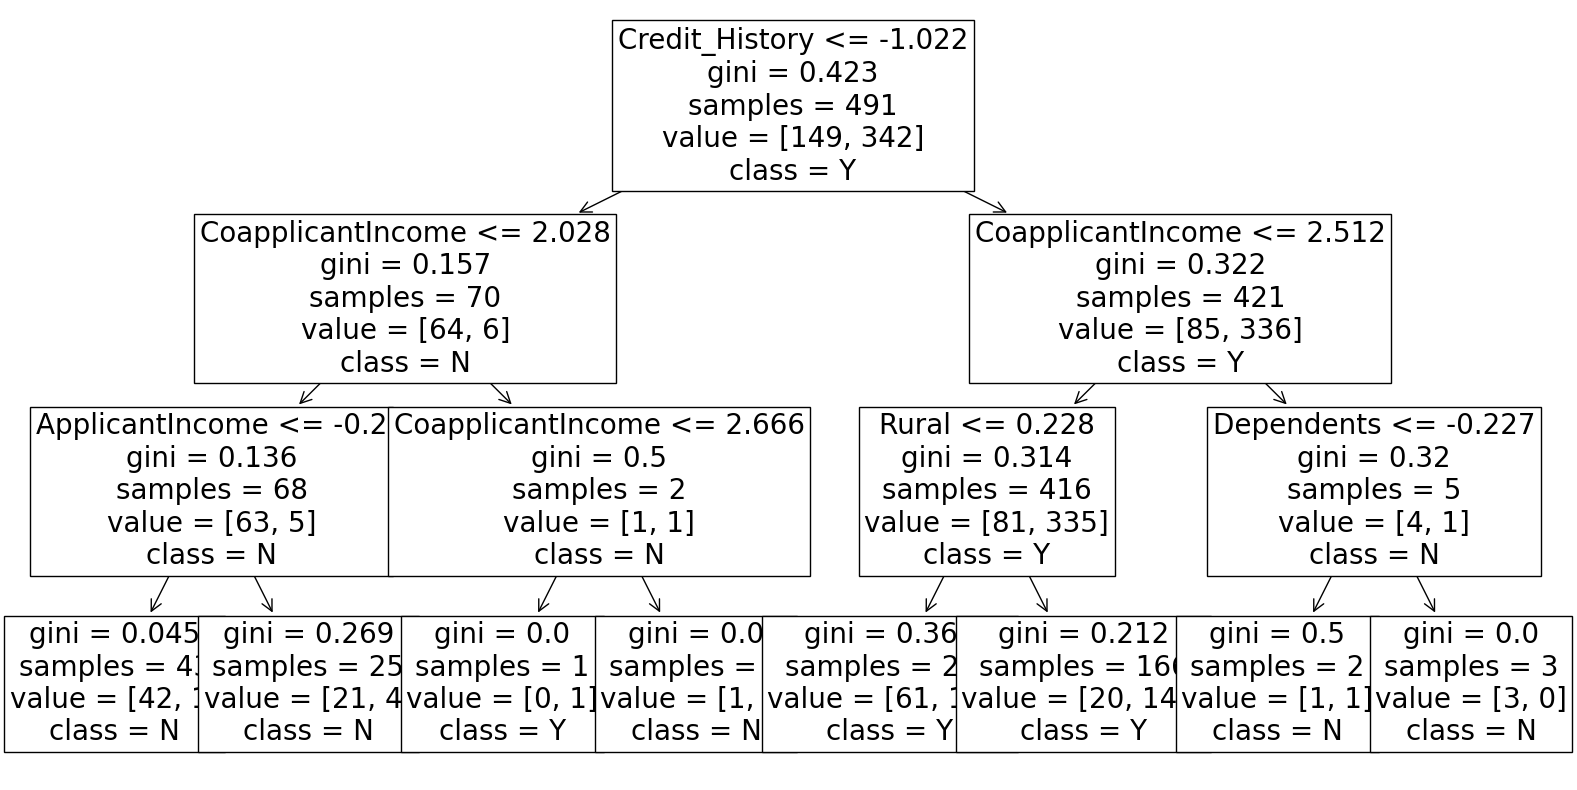

In [1]:
import pandas as pd
import numpy as np
data = pd.read_excel('practice_lab_3.xlsx')
originalData = data.copy()
columns = list(data.columns)
mask = data['Gender'].values == 'Female'
data.loc[mask, 'Gender'] = 1
data.loc[~mask, 'Gender'] = 0
#%%
cat_feature = pd.Categorical(data.Property_Area)
one_hot = pd.get_dummies(cat_feature)
data = pd.concat([data, one_hot], axis = 1)
data = data.drop(columns = ['Property_Area'])
def qualitative_to_0_1(data, column,value_to_be_1):
    mask = data [column].values == value_to_be_1
    data.loc[mask, column] = 1
    data.loc[~mask, column] = 0
    return data
data=qualitative_to_0_1(data, 'Married', 'Yes')
data=qualitative_to_0_1(data, 'Education', 'Graduate')
data=qualitative_to_0_1(data, 'Self_Employed', 'Yes')
data=qualitative_to_0_1(data, 'Loan_Status', 'Y')
#%%
from sklearn.model_selection import train_test_split
data=data.astype(np.float64)
X=data.drop('Loan_Status', axis=1)
y=data['Loan_Status']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)
#%%
from sklearn.neighbors import KNeighborsClassifier as kNN
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC as SVM
models = [kNN(), SVM()]
for model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
#%%
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
#%%
from sklearn.neighbors import KNeighborsClassifier as kNN
from sklearn.svm import SVC
models = [kNN(), SVC()]
for model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
#%%
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.tree import plot_tree
model = DT(max_depth=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
from matplotlib import pyplot as plt
plt.figure(figsize=(20,10))
tree_vis = plot_tree(model,feature_names=data.columns[:-1],class_names=['N', 'Y'], fontsize = 20)

## Ex4

In [8]:
TN = 7
FP = 26
FN = 17
TP = 73

sensitivity = TP/(TP+FN)
precision = TP/(TP+FP)
specificity = TN/(FP+TN)
accuracy = (TP+TN)/(TP+FN+FP+TN)
F1 = 2*(sensitivity*precision)/(sensitivity+precision)
print({"F1":F1,"sensitivity":sensitivity,"specificity":specificity,"accuracy":accuracy,"precision":precision})

{'F1': 0.7724867724867724, 'sensitivity': 0.8111111111111111, 'specificity': 0.21212121212121213, 'accuracy': 0.6504065040650406, 'precision': 0.7373737373737373}


## Ex7

c:\Users\marci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\marci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

kNN results for: 2 neighbours and 'uniform' weight function
accuracy: 0.9385964912280702, confusion matrix: 
[[40  3]
 [ 4 67]]
kNN results for: 3 neighbours and 'uniform' weight function
accuracy: 0.9473684210526315, confusion matrix: 
[[40  3]
 [ 3 68]]
kNN results for: 4 neighbours and 'uniform' weight function
accuracy: 0.956140350877193, confusion matrix: 
[[41  2]
 [ 3 68]]
kNN results for: 5 neighbours and 'uniform' weight function
accuracy: 0.9473684210526315, confusion matrix: 
[[40  3]
 [ 3 68]]
kNN results for: 6 neighbours and 'uniform' weight function
accuracy: 0.956140350877193, confusion matrix: 
[[41  2]
 [ 3 68]]
kNN results for: 7 neighbours and 'uniform' weight function
accuracy: 0.9473684210526315, confusion matrix: 
[[40  3]
 [ 3 68]]
kNN results for: 8 neighbours and 'uniform' weight function
accuracy: 0.956140350877193, confusion matrix: 
[[41  2]
 [ 3 68]]
kNN results for: 9 neighbours and 'uniform' weight function
accuracy: 0.9649122807017544, confusion matrix:

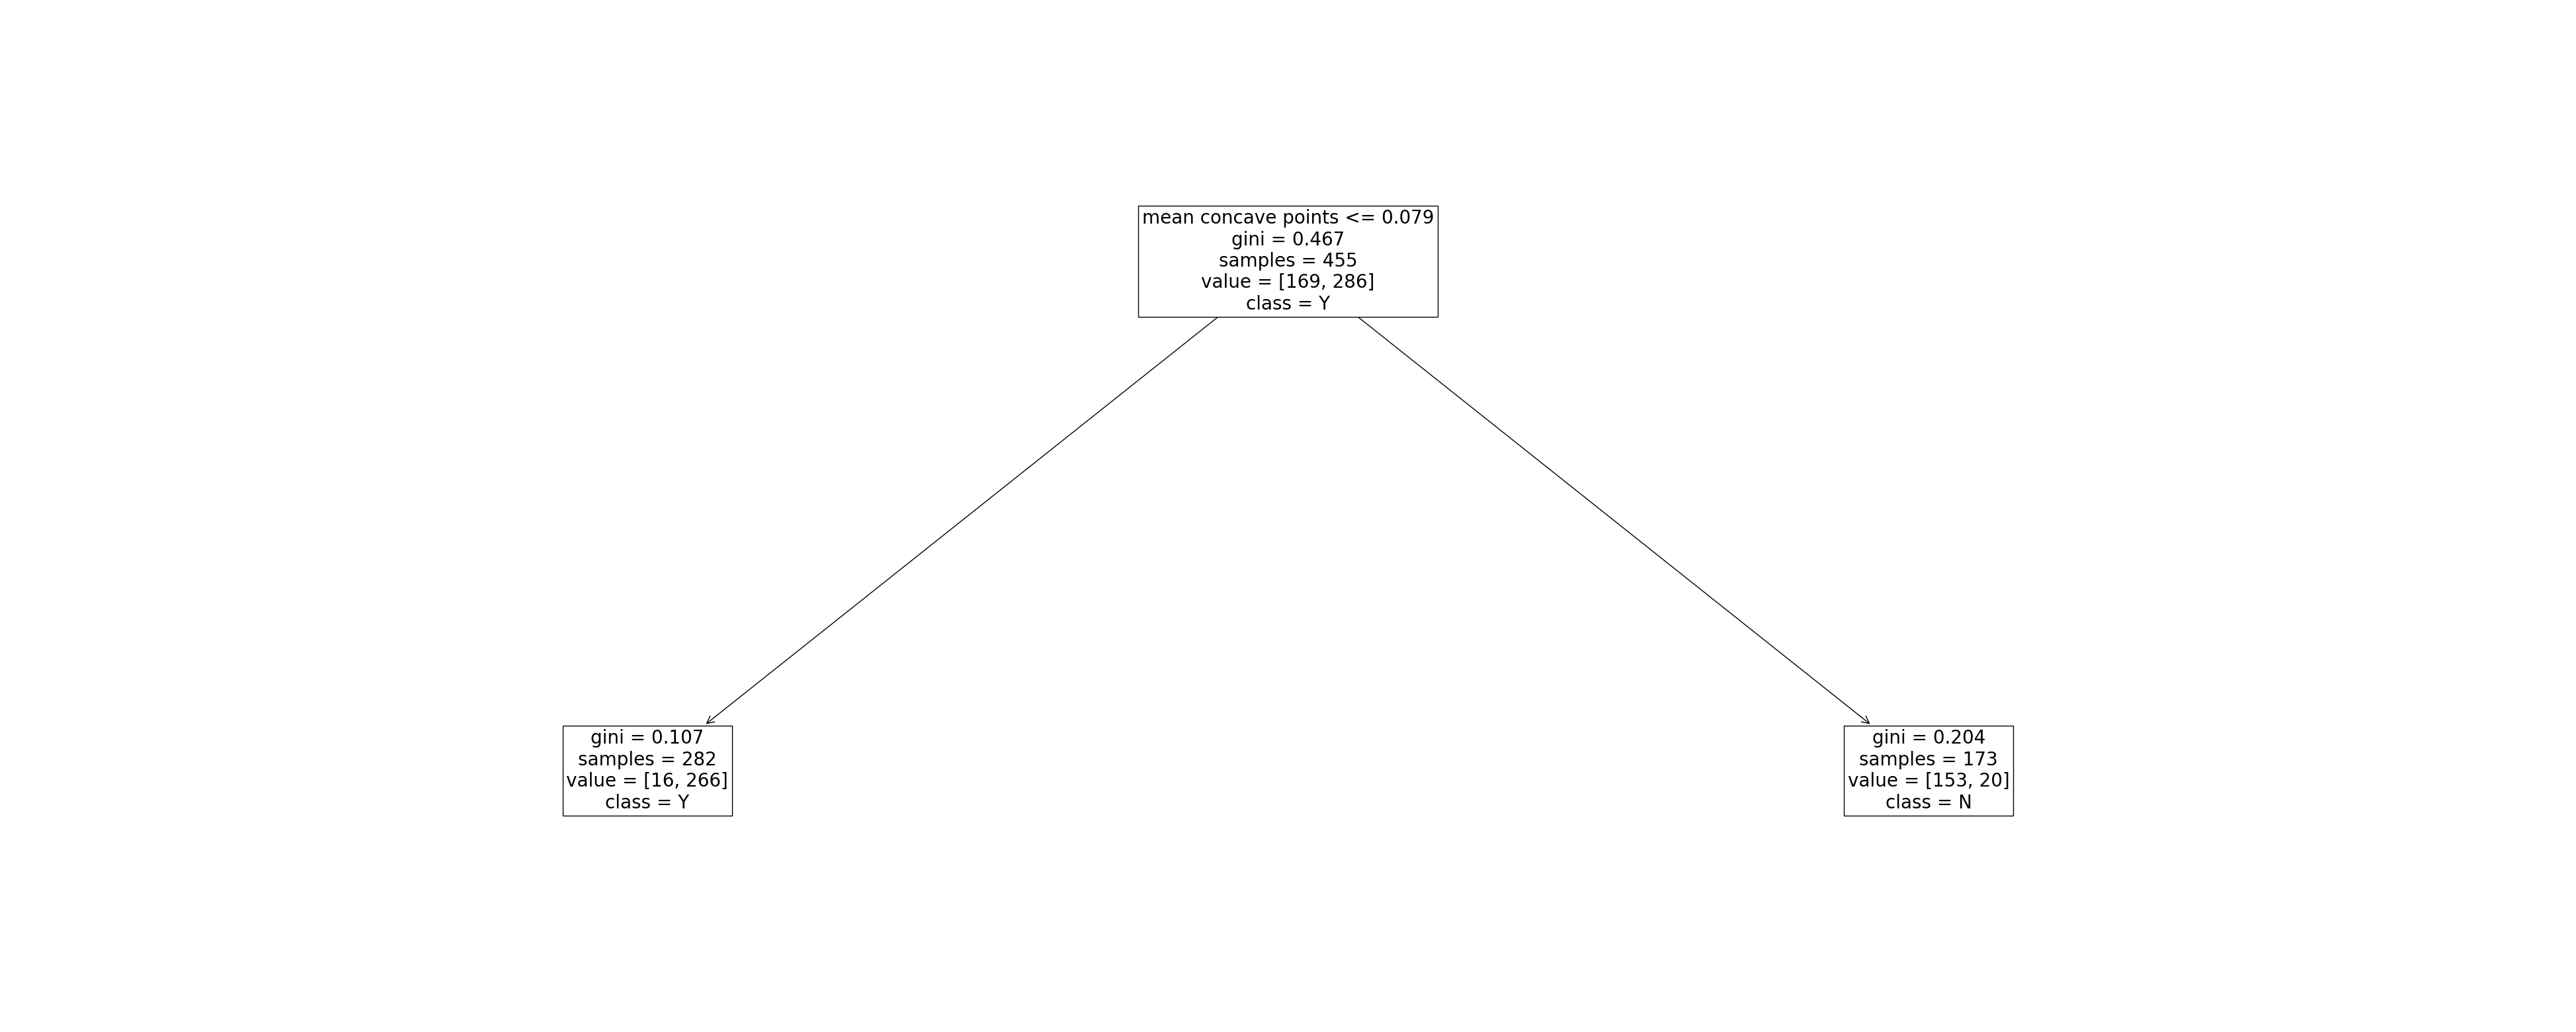

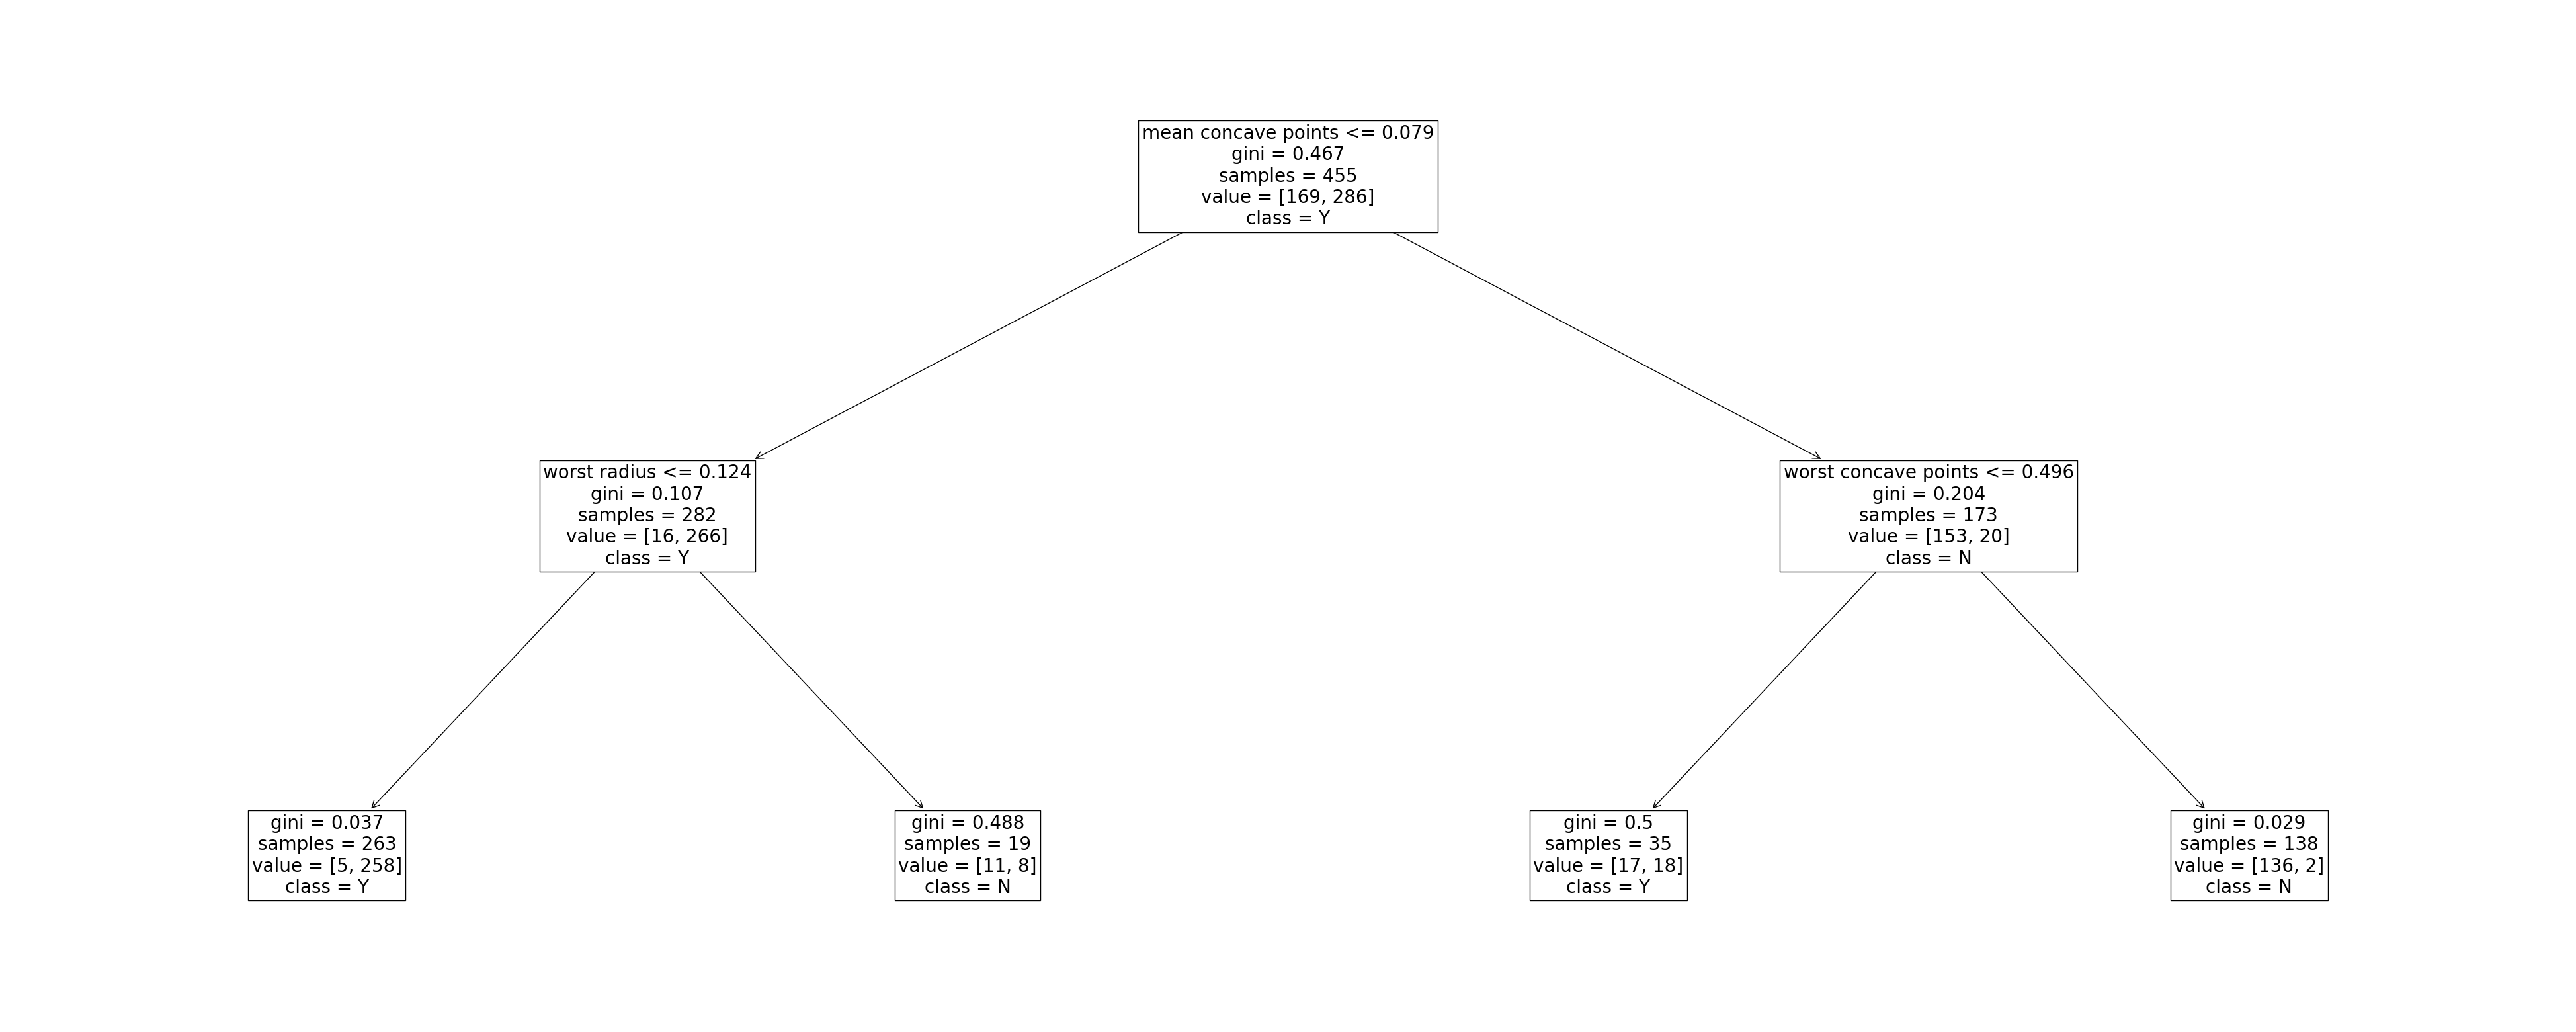

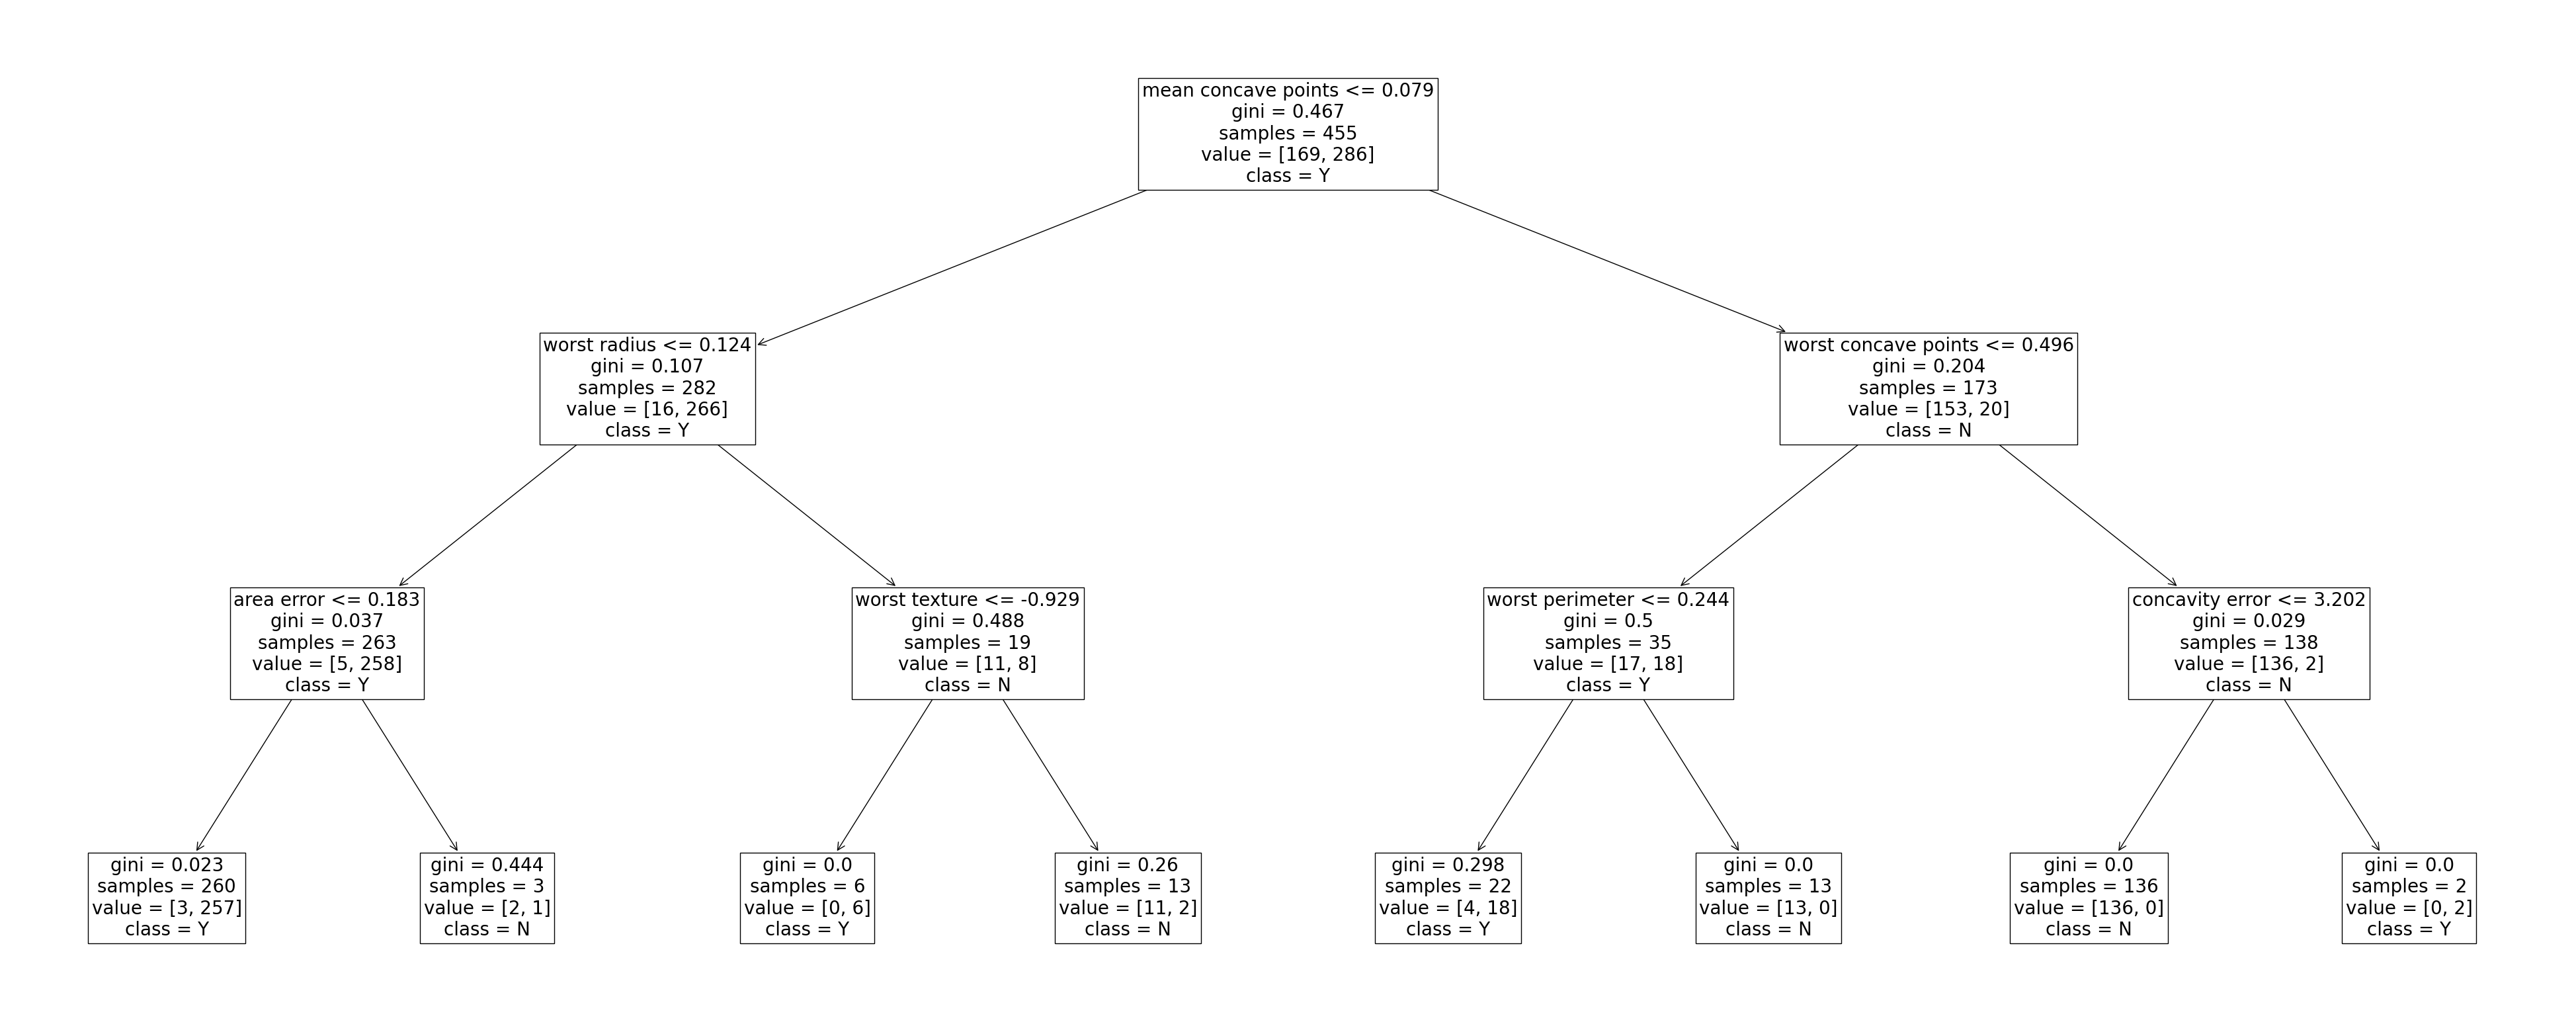

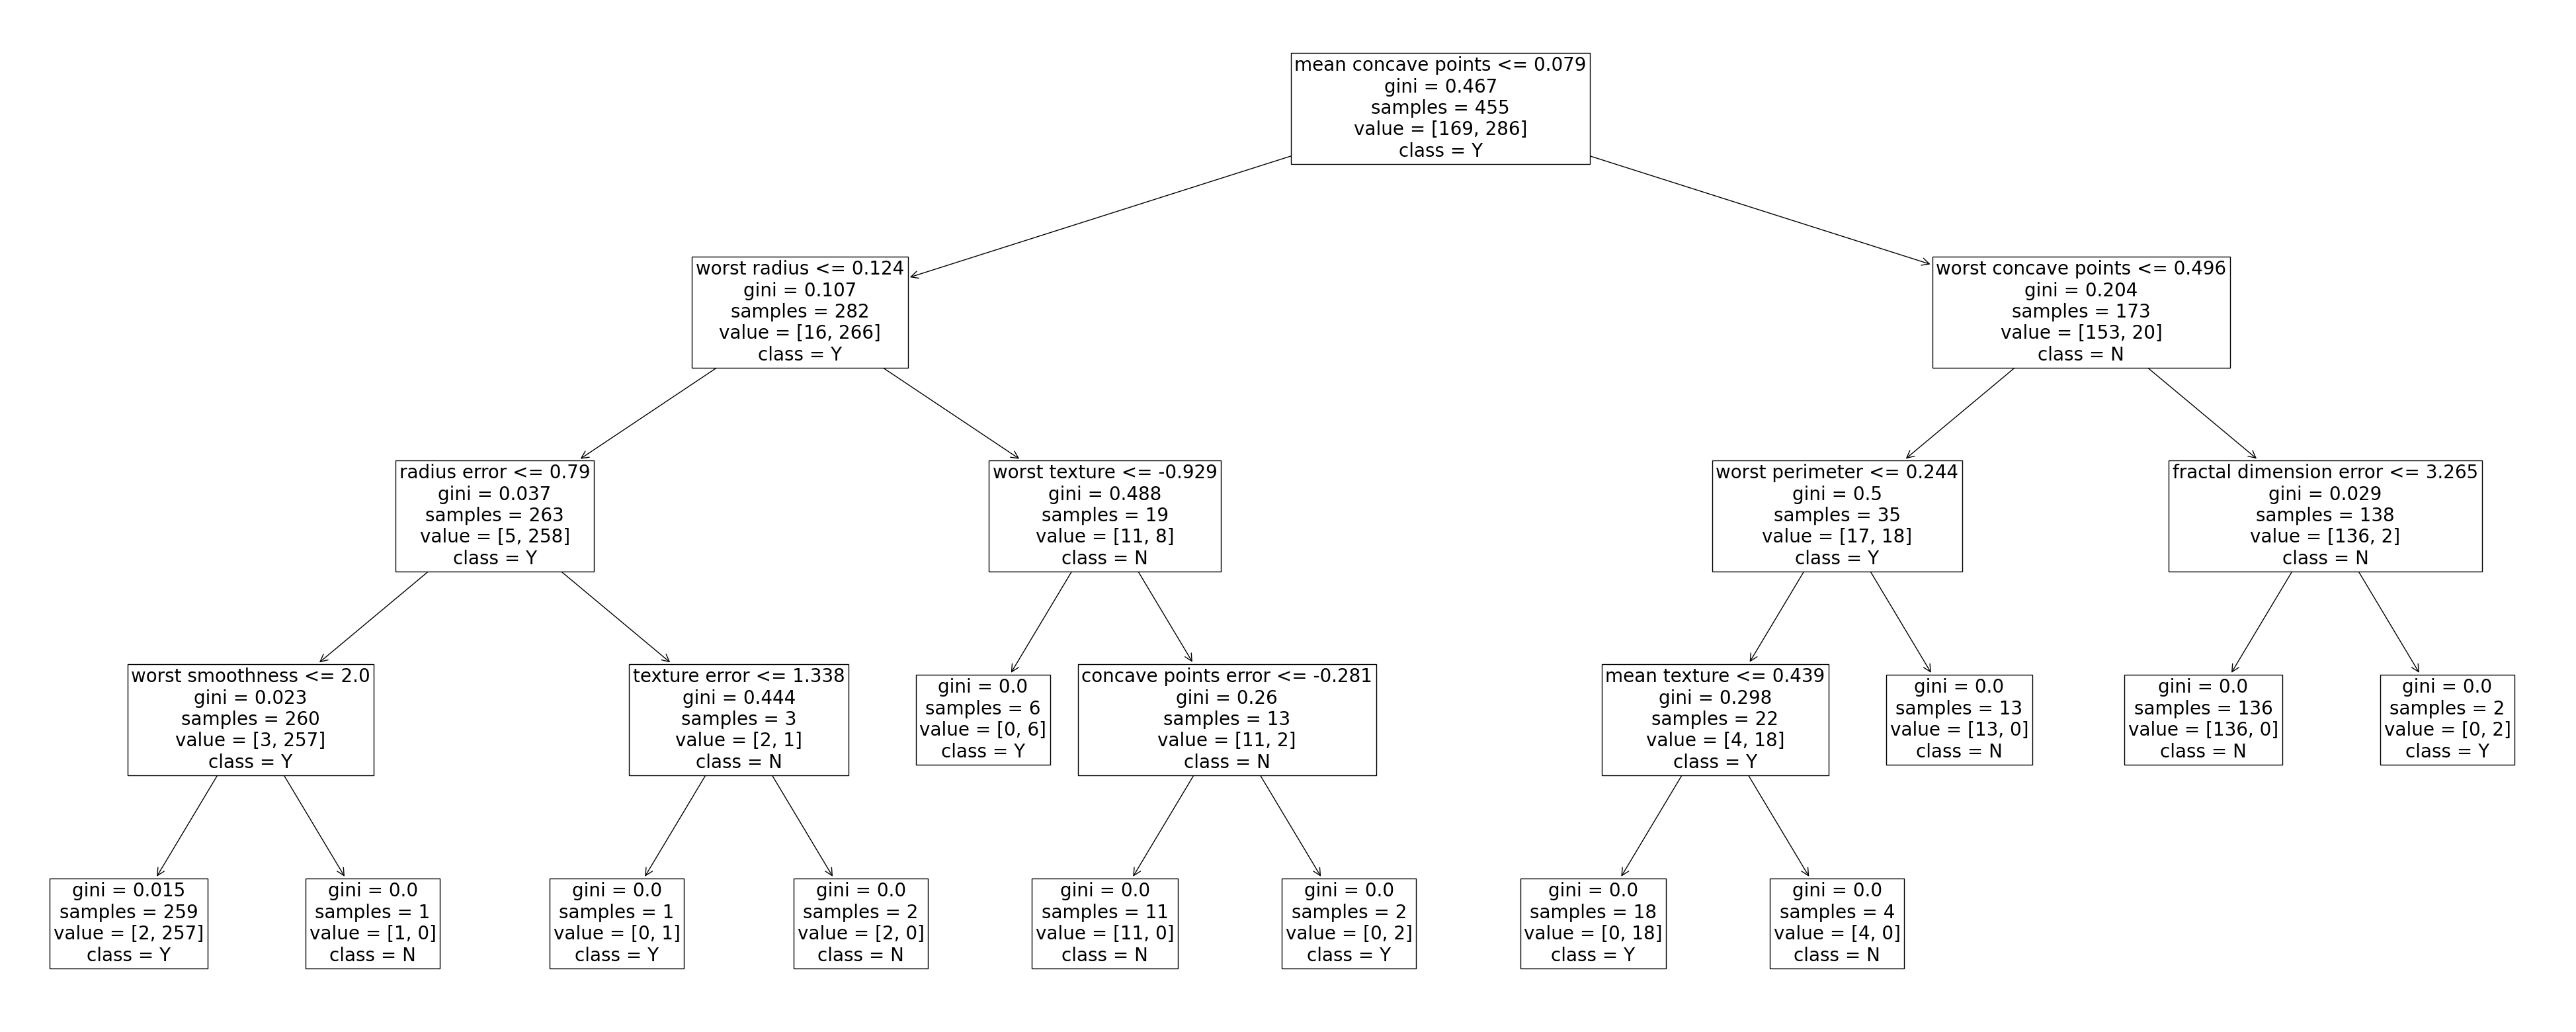

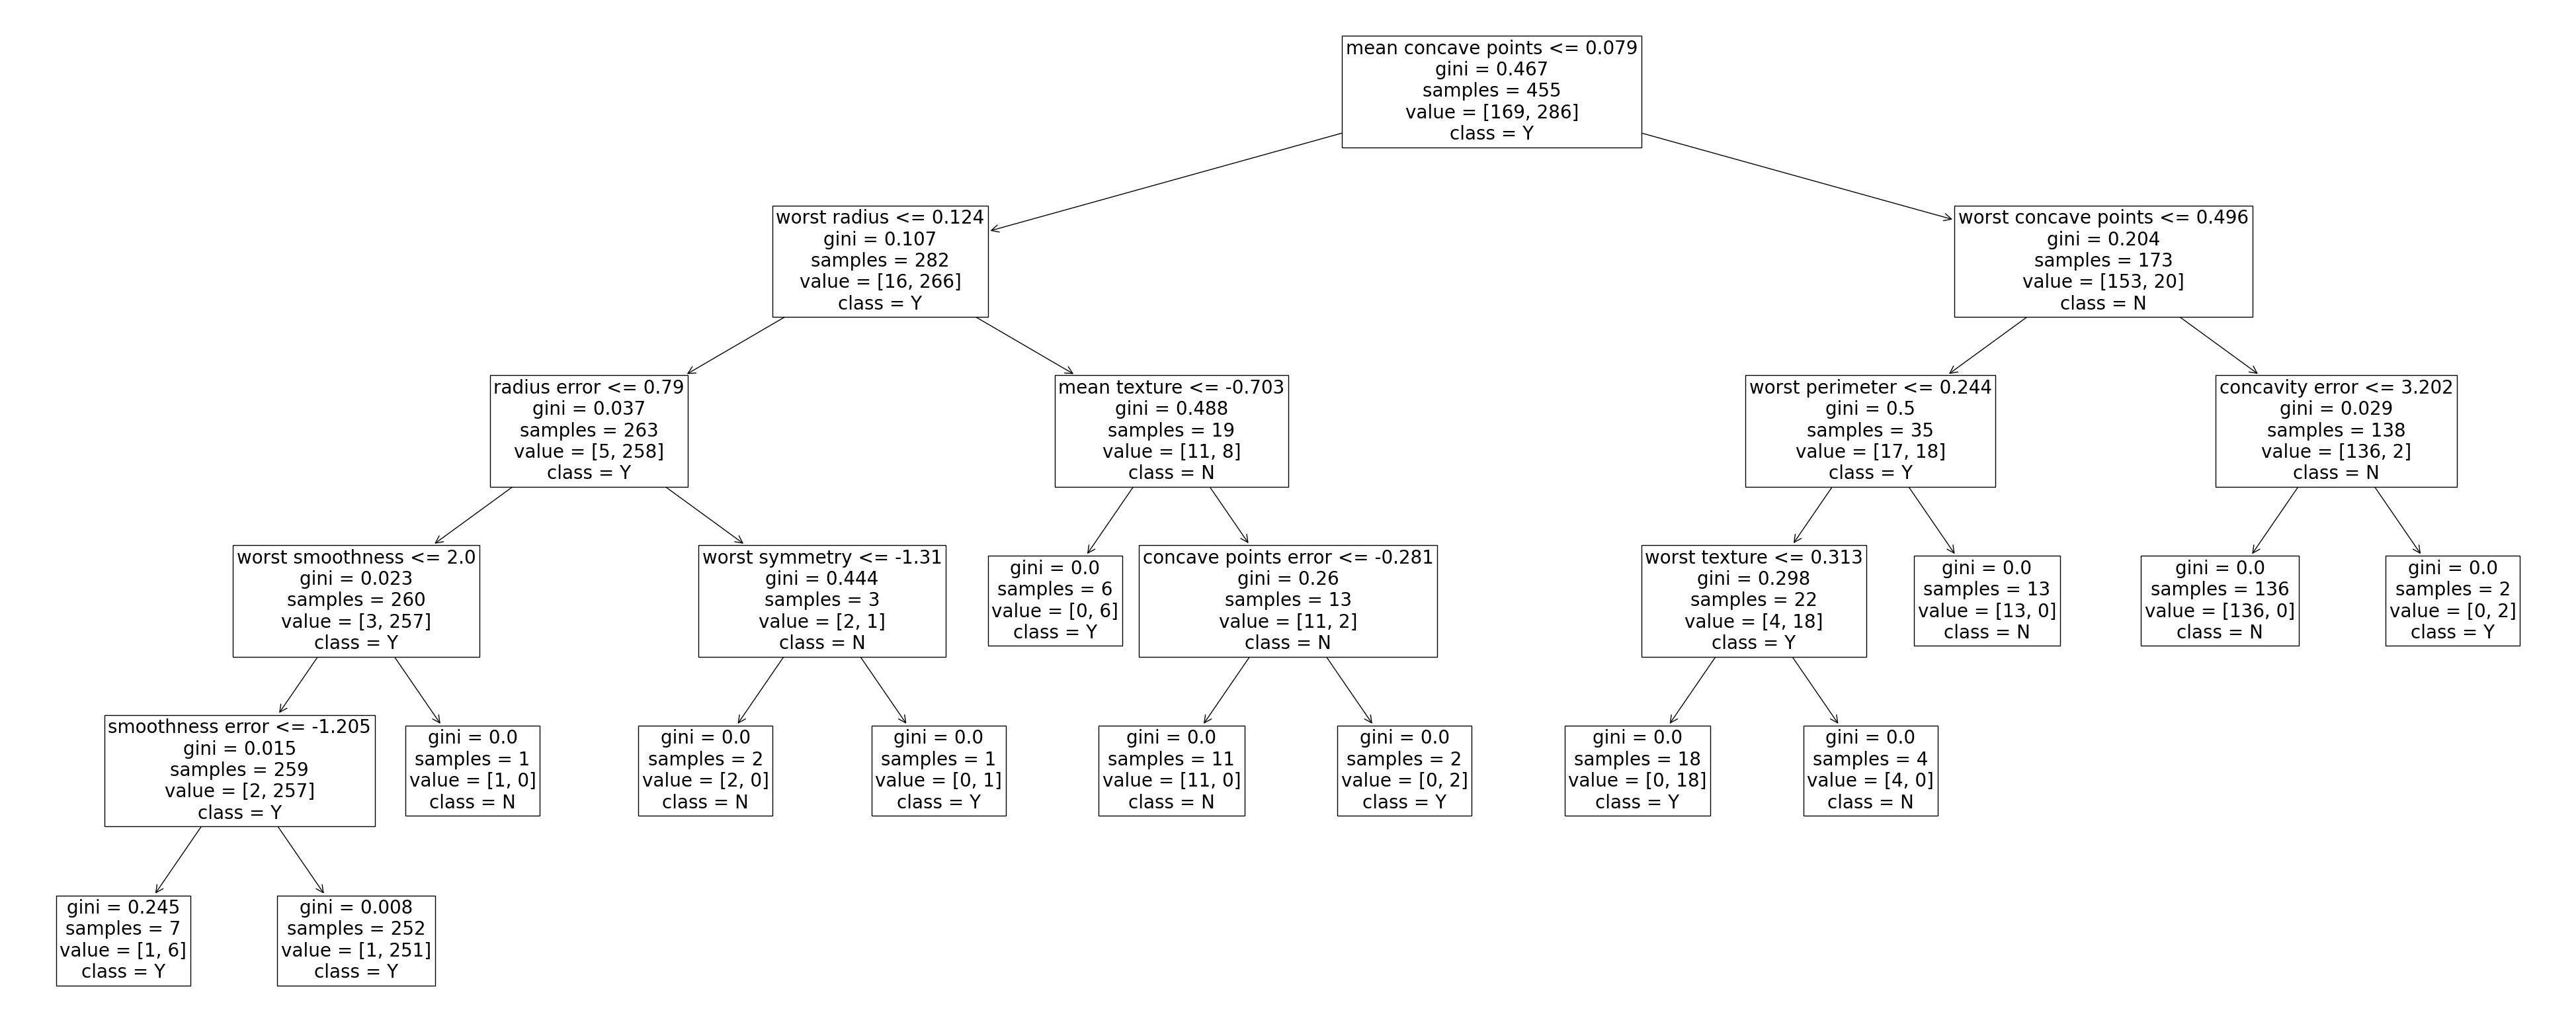

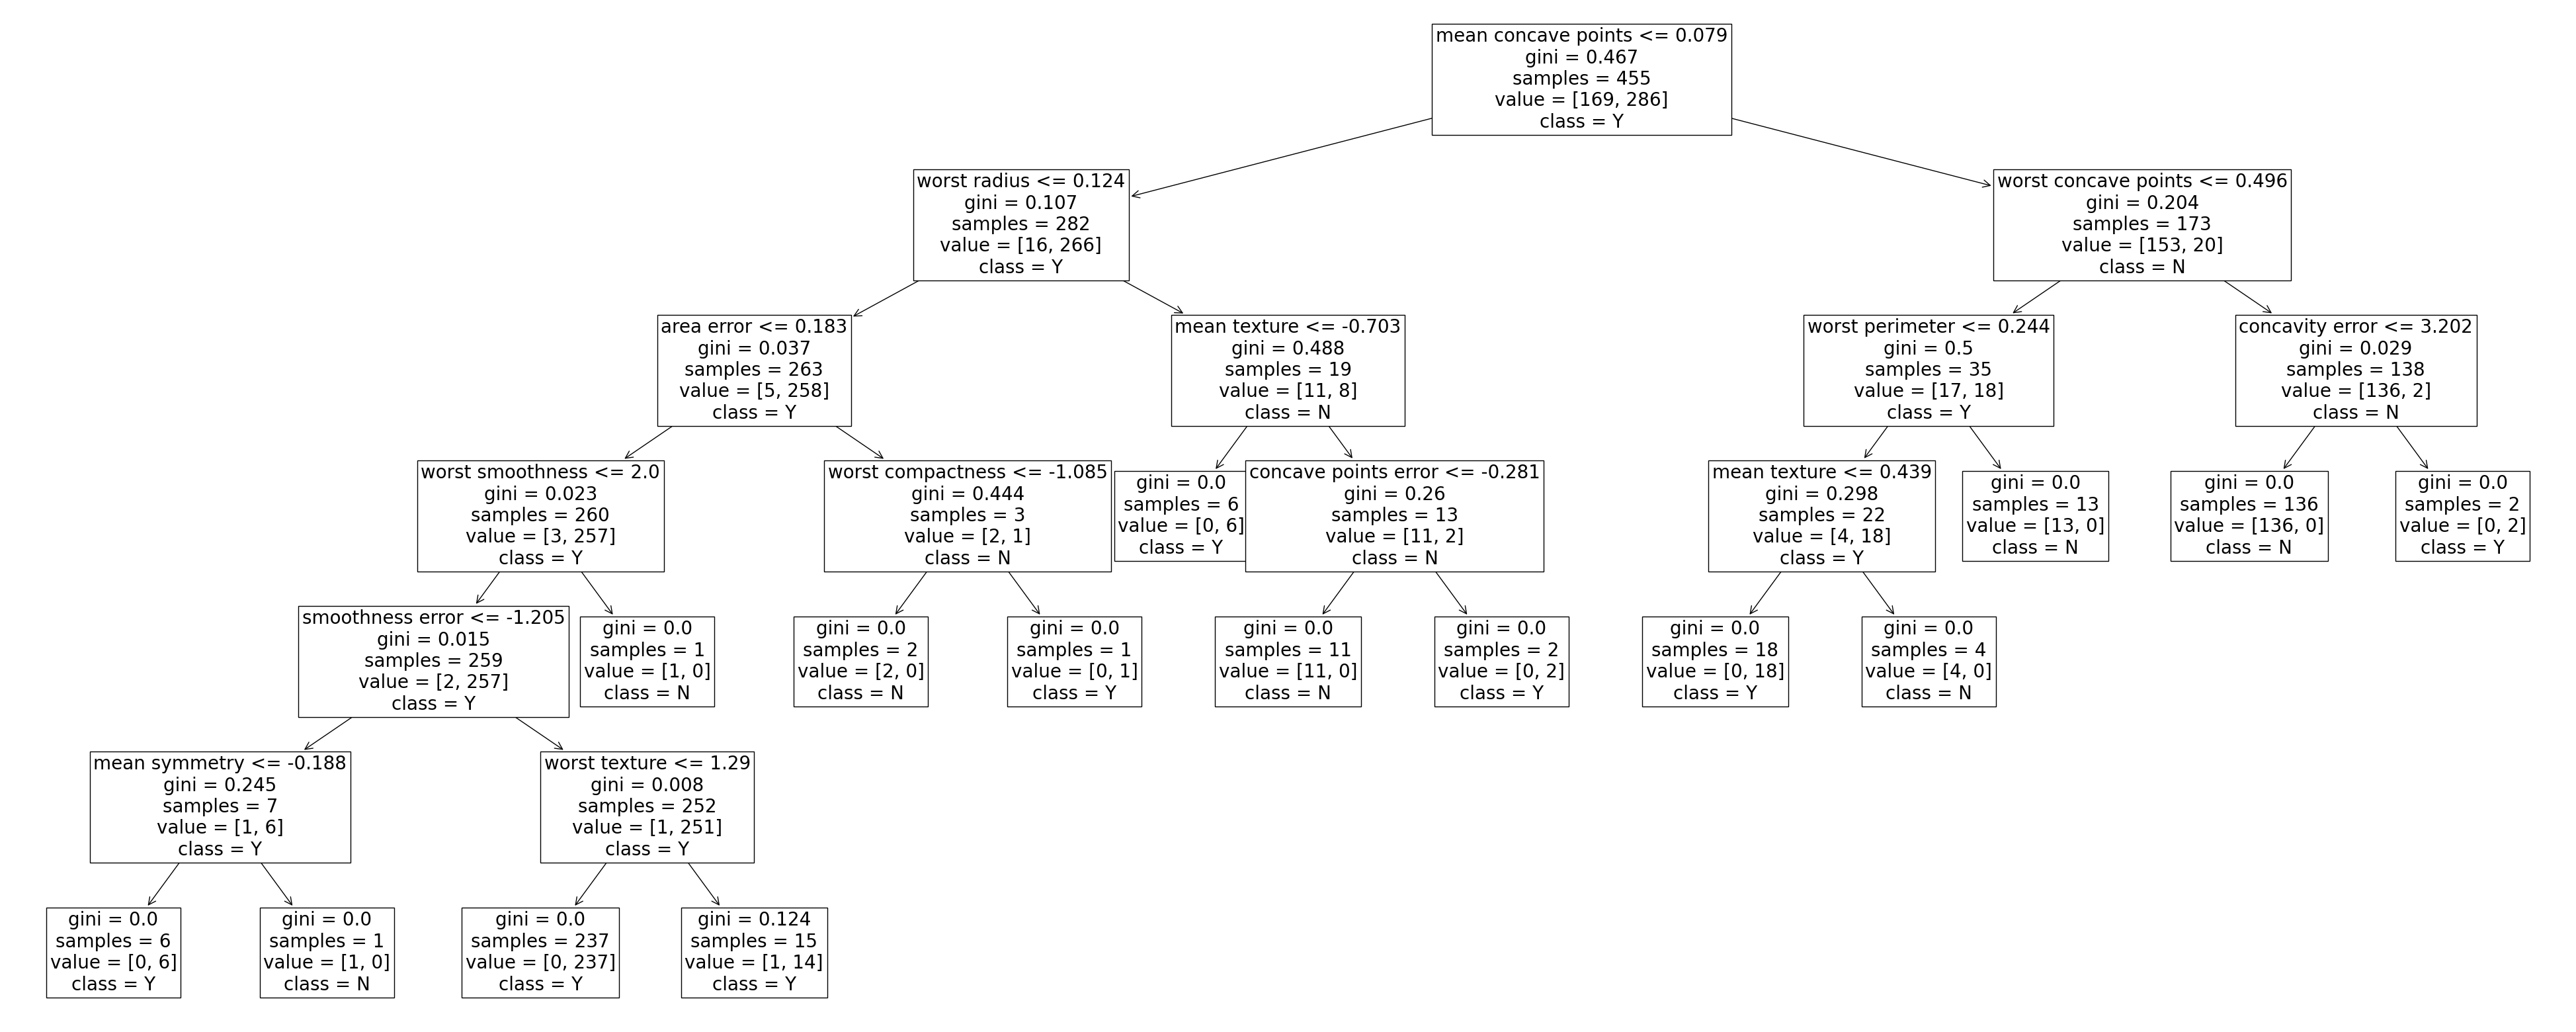

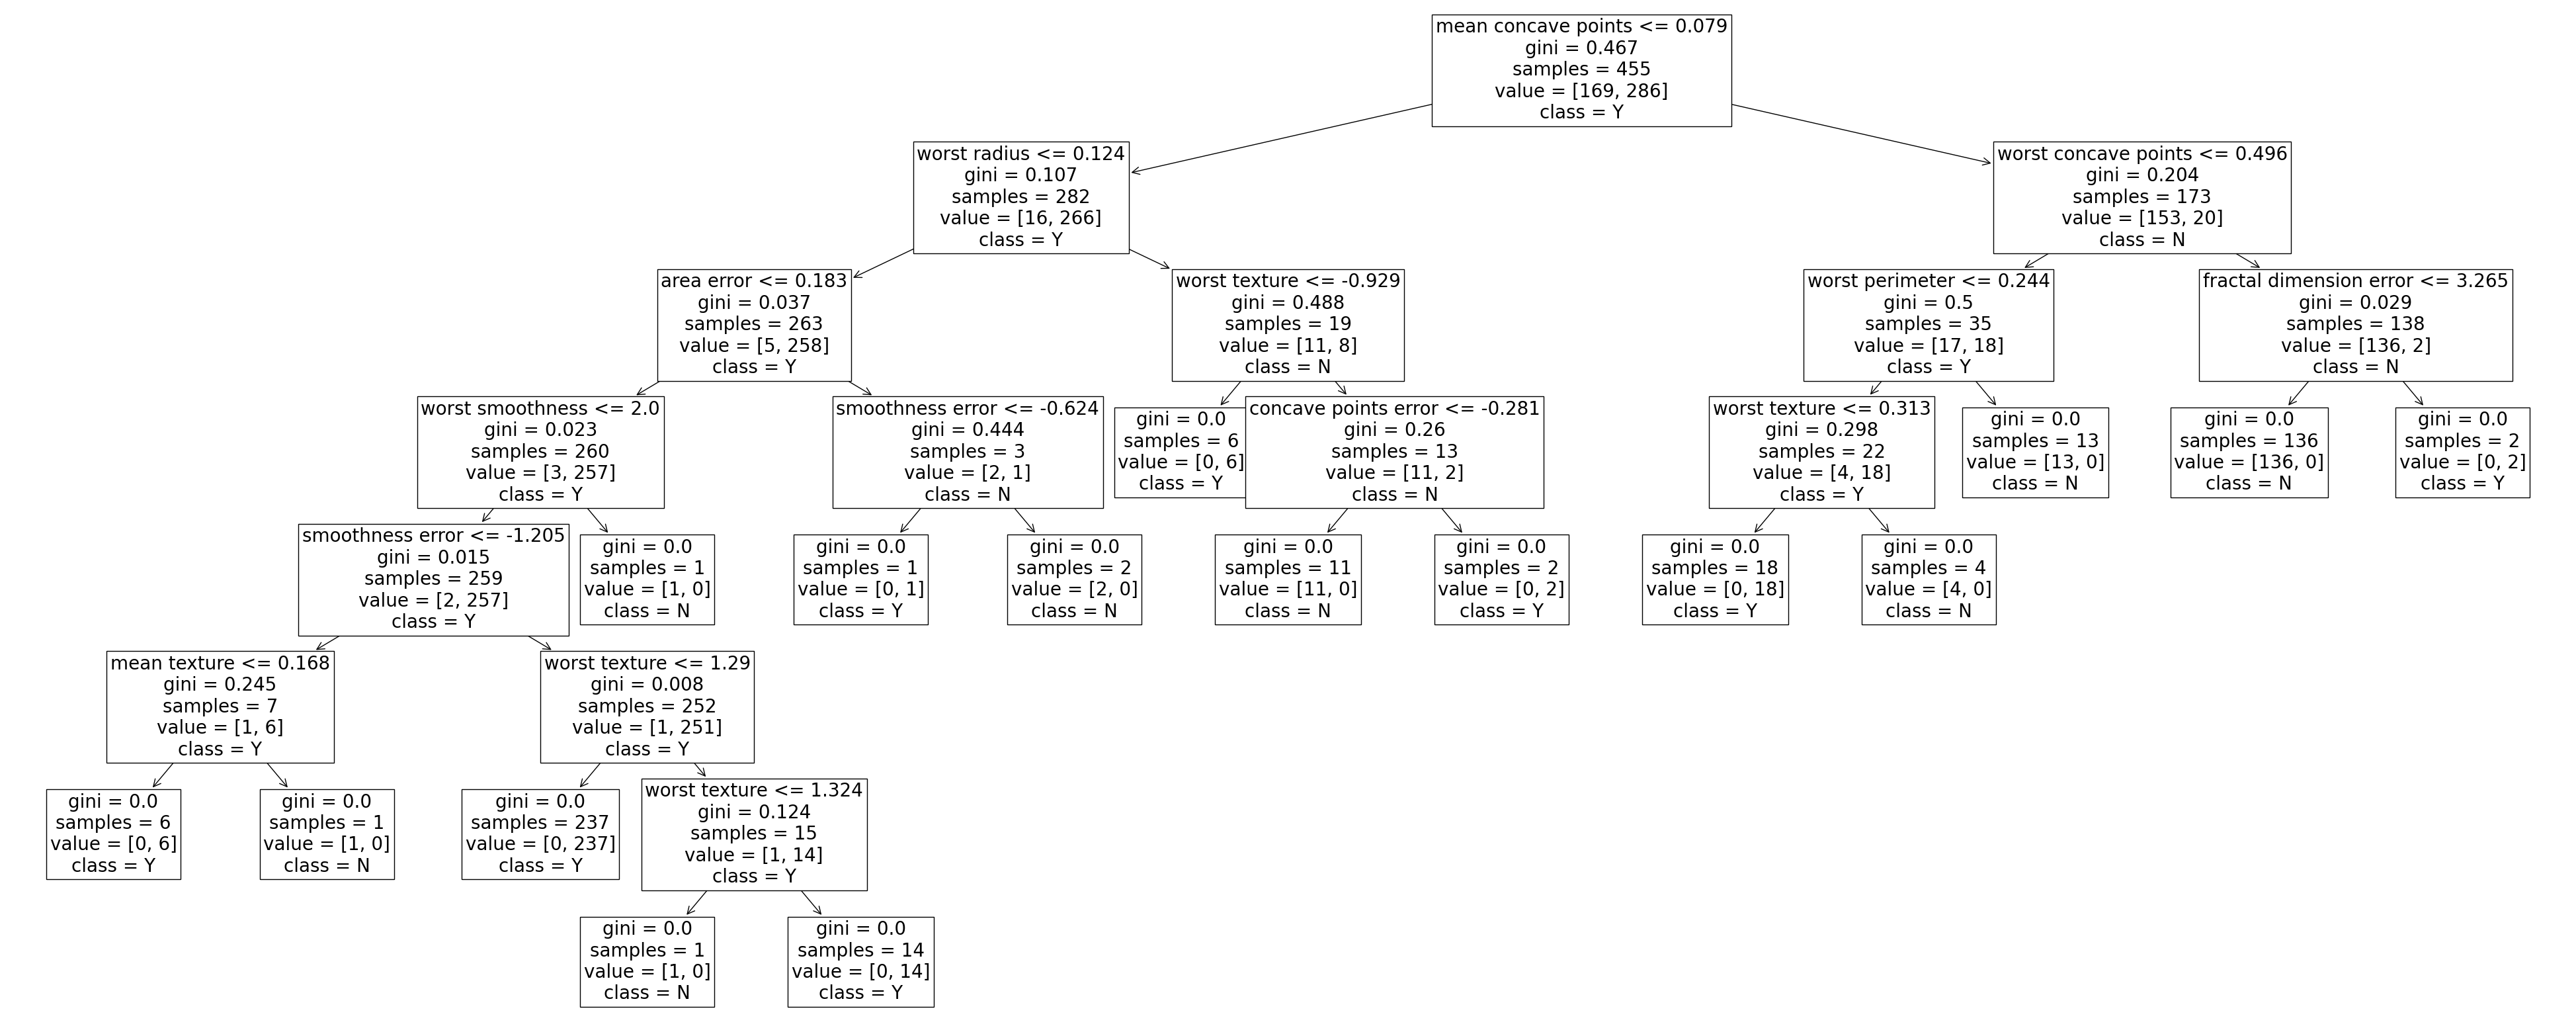

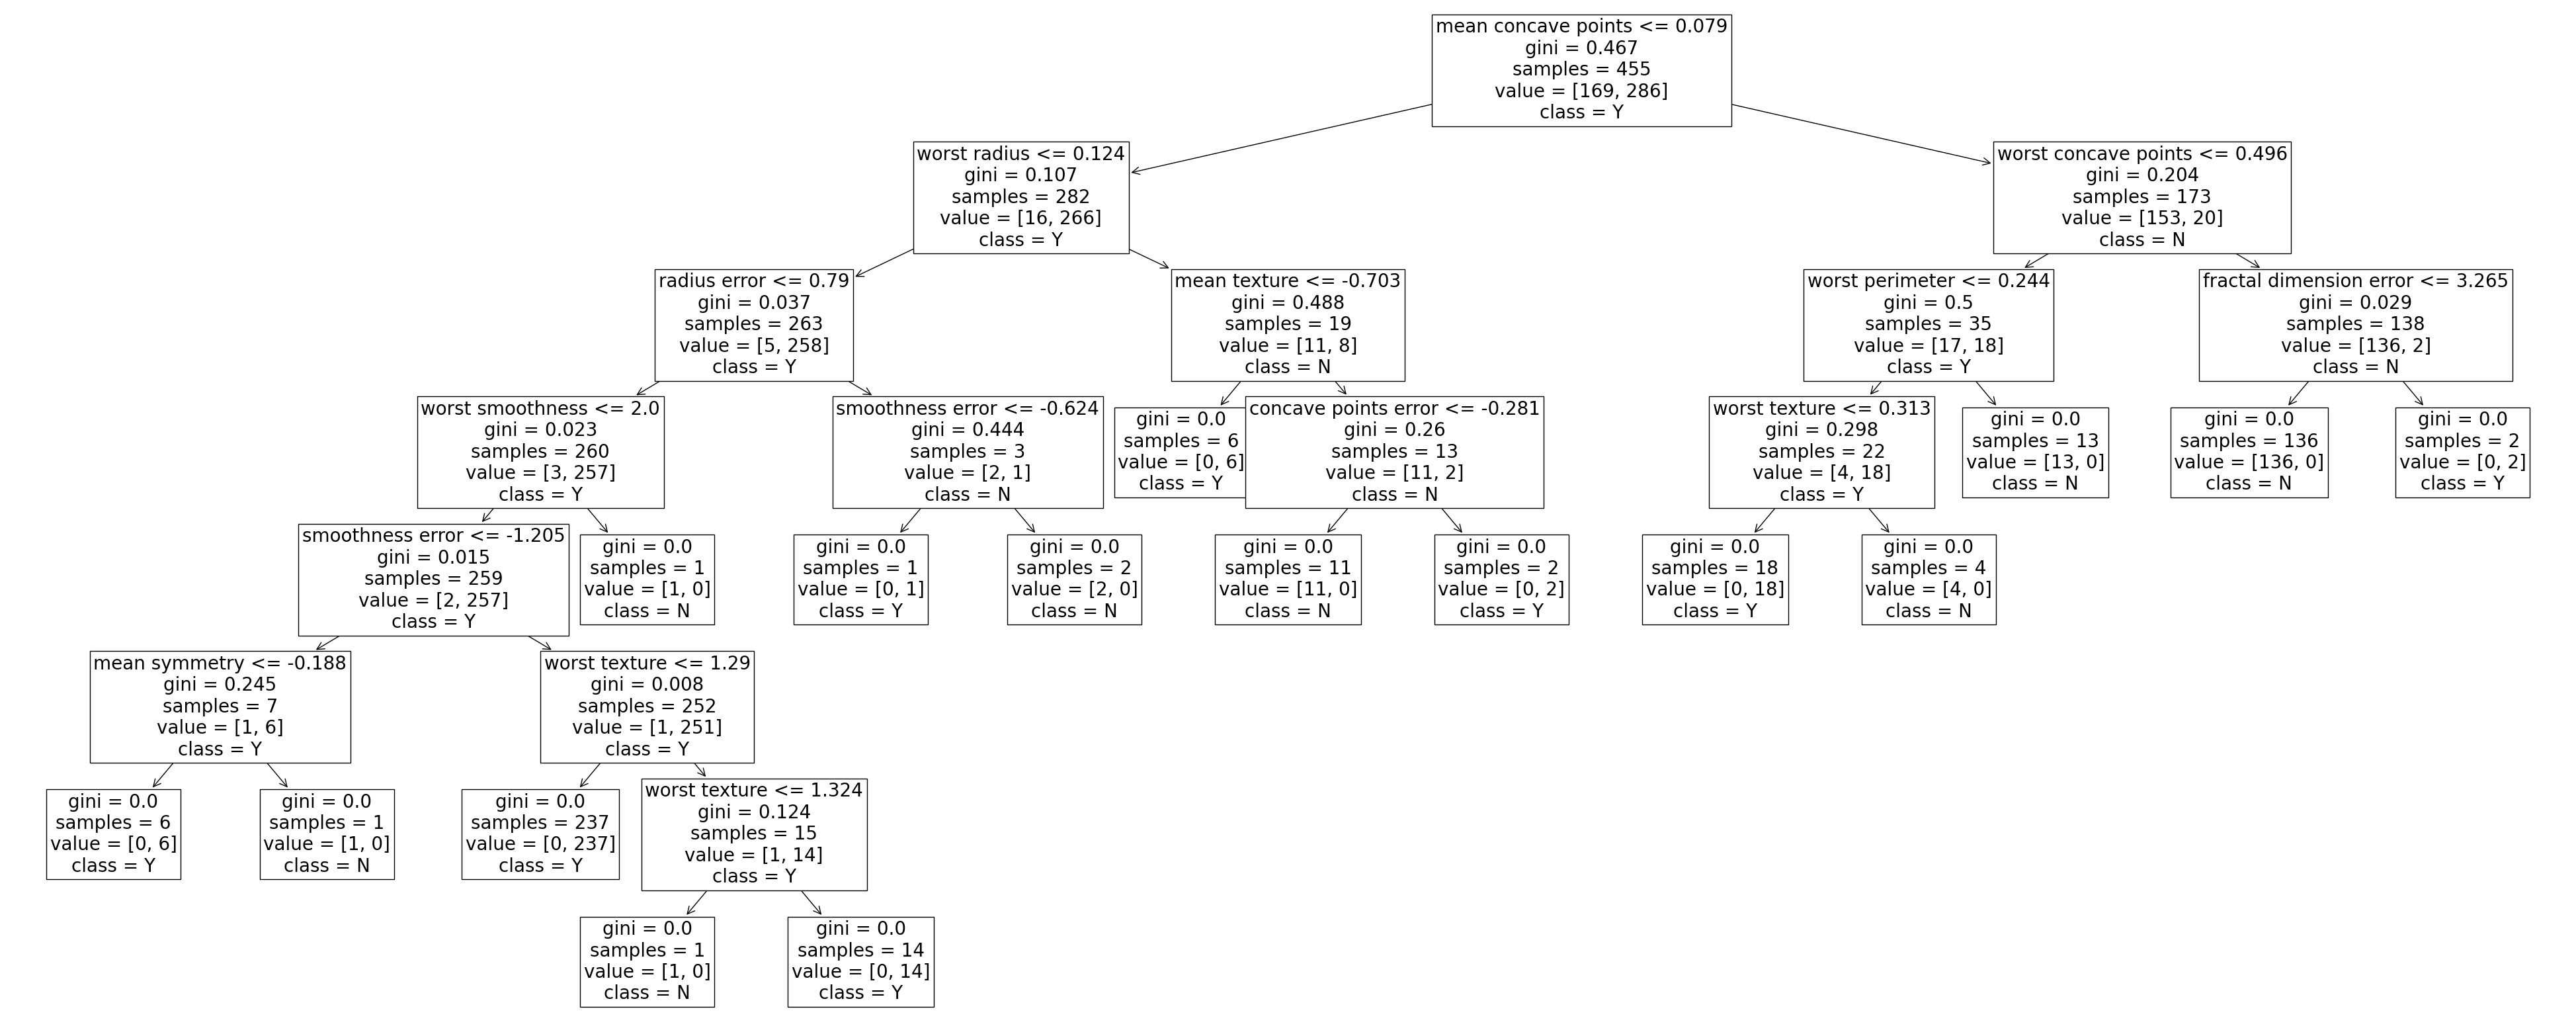

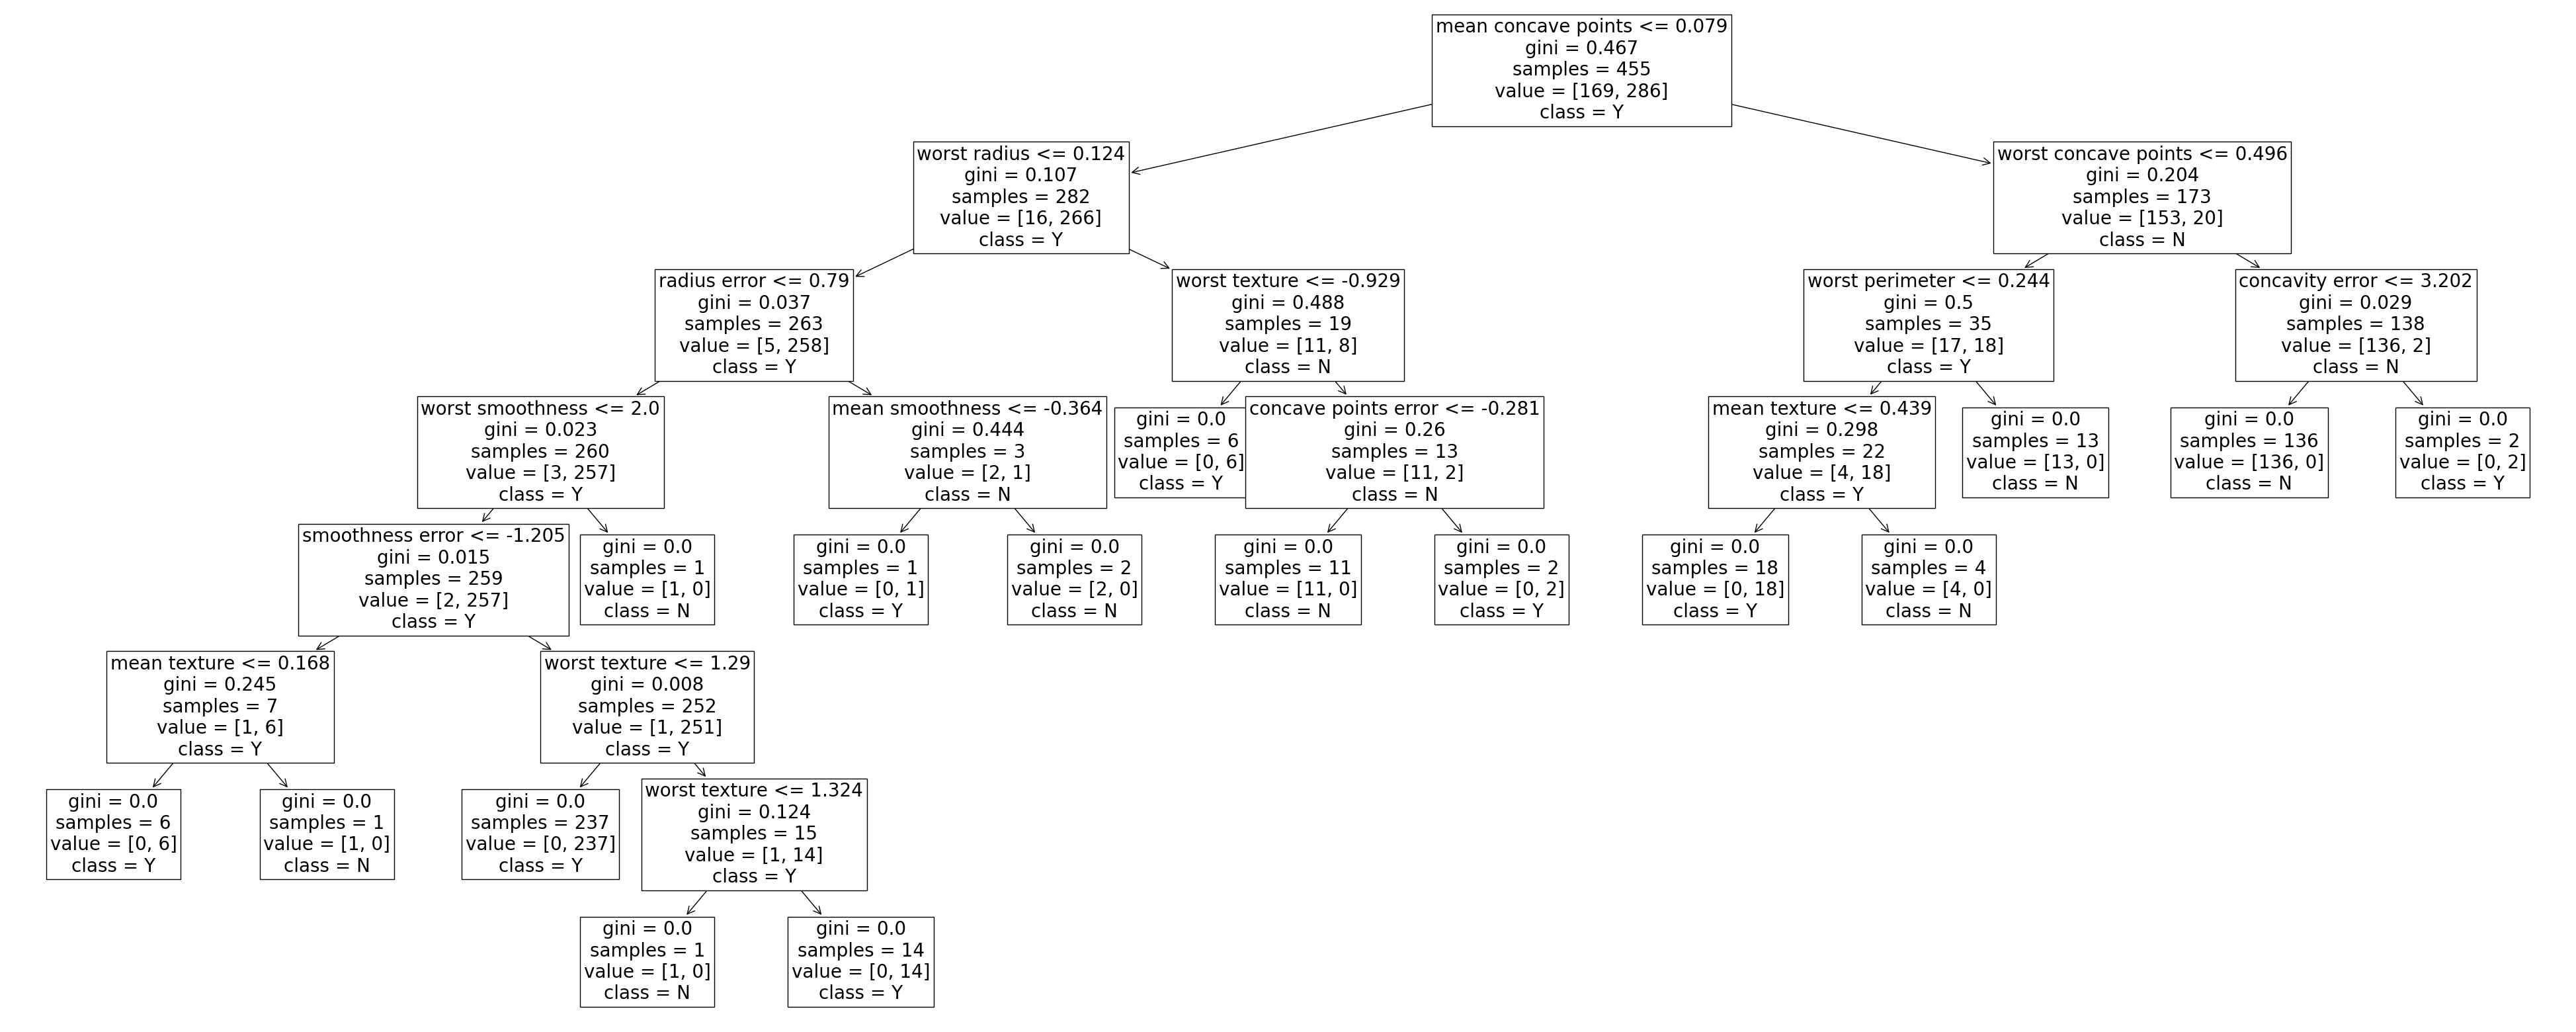

In [9]:
#%%
import numpy as np
from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier as kNN
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC as SVM
#%% Podział
X, y = load_breast_cancer(return_X_y=True,as_frame=True)

columns = list(X.columns)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
#%% Skalowanie
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train) #Teaching scaler only with train data
X_train = scaler.transform(X_train) #Transforming train and...
X_test = scaler.transform(X_test) #...test data
#%% Testowanie kNN i SVM
for weight in ('uniform','distance'):   #Test for every weight
    for neighbours in range(2,10,1):        #and neighbour combination
        kNN_model = kNN(neighbours,weights=weight)
        kNN_model.fit(X_train,y_train)
        y_pred = kNN_model.predict(X_test)
        print("kNN results for: {} neighbours and '{}' weight function".format(neighbours,weight))
        print("accuracy: {}, confusion matrix: ".format(accuracy_score(y_test,y_pred)))
        print(confusion_matrix(y_test, y_pred))

for kernel in ('linear', 'poly', 'rbf', 'sigmoid'): #Test for every type of kernel (precoumputed requires square matrix)
    
    SVM_model = SVM(kernel=kernel)
    SVM_model.fit(X_train,y_train)
    y_pred = SVM_model.predict(X_test)
    print("SVM results for: {} kernel".format(kernel))
    print("accuracy: {}, confusion matrix: ".format(accuracy_score(y_test,y_pred)))
    print(confusion_matrix(y_test, y_pred))
#%% Testowanie DT
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.tree import plot_tree

for depth in range(1,10,1):
    
    model = DT(max_depth=depth)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("DT results for: {} max depth".format(depth))
    print("accuracy: {}, confusion matrix: ".format(accuracy_score(y_test,y_pred)))
    print(confusion_matrix(y_test, y_pred))

    #%% Rysowanie drzew
    from matplotlib import pyplot as plt
    plt.figure(figsize=(50,20))
    tree_vis = plot_tree(model,feature_names=columns[:-1],class_names=['N', 'Y'], fontsize = 20)